# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar data cleaning and preparation as we did in the FTE. Specifically, at least complete these minimum requirements:

- Check for outliers in numeric data, and deal with them if needed
- Check for missing values, and decide how to deal with them if needed
- Convert categorical columns to numeric values
- Create at least one new feature by combining multiple columns. For example, you could calculate the ratio of total charges to tenure. Create at least one plot for your new feature.
- Save the data to a csv (or another filetype of your choice) for use next week.
- Write a short analysis at the end of the notebook describing your findings and what you did.

You can do more data cleaning, preparation, and EDA beyond these basic requirements if you want to learn more and develop your data science skills. For example, you could use a box-cox transformation on the numeric data or try other outlier methods.

### DS process status

Here is our data science process, and where we are (#3):

**1. Business understanding**

Can we use machine learning to predict if a customer will churn before they leave?

**2. Data understanding**

Done in week 1 (mostly), this is iterative so you might do more of this as we go on.

**3. Data preparation**

We are here this week.


**4. Modeling**

Next week


**5. Evaluation**

Next week


**6. Deployment**

Next week

### Summary

Write your summary of the process and results here.

In [2]:
import pandas as pd

In [7]:
df = pd.read_csv('churn_data.csv')

In [8]:
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


In [9]:
df['Churn'] == 'Yes'

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Churn, Length: 7043, dtype: bool

<AxesSubplot:>

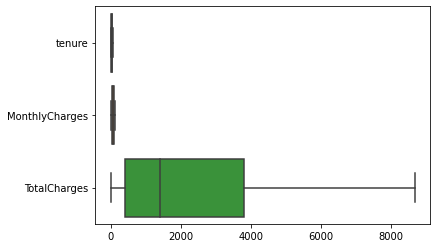

In [10]:
import seaborn as sns

sns.boxplot(data=df, orient='h')

In [20]:
#NO OUTLIERS SO I DON'T REALLY NEED TO DO THIS. BUT I WILL ANYWAY

column = 'TotalCharges'
q1 = df[column].quantile(0.25)
q3 = df[column].quantile(0.75)
iqr = q3 - q1
upper_boundary = q3 + 1.5 * iqr
lower_boundary = q1 - 1.5 * iqr
df[(df[column] < lower_boundary) | (df[column] > upper_boundary)][column]

Series([], Name: TotalCharges, dtype: float64)

In [15]:
import numpy as np

# make a copy so as to to alter the original data
df_copy = df.copy()
df_copy.at[df[column] < lower_boundary, column] = np.nan
df_copy.at[df[column] > upper_boundary, column] = np.nan

<AxesSubplot:>

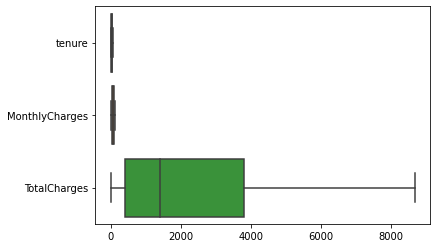

In [16]:
sns.boxplot(data=df_copy, orient='h')

In [21]:
df.isna().sum()


customerID         0
tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [22]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [23]:
df.isna().sum()

customerID        0
tenure            0
PhoneService      0
Contract          0
PaymentMethod     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [24]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [25]:
df['Contract'] = df['Contract'].replace({'One year': 1, 'Two year': 2, 'Month-to-month': 12})
df['Contract']

0       12
1        1
2       12
3        1
4       12
        ..
7038     1
7039     1
7040    12
7041    12
7042     2
Name: Contract, Length: 7043, dtype: int64

In [26]:
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})
df['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64

In [28]:
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4})
df['PaymentMethod']

0       1
1       2
2       2
3       3
4       1
       ..
7038    2
7039    4
7040    1
7041    2
7042    3
Name: PaymentMethod, Length: 7043, dtype: int64

In [29]:
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,12,1,29.85,29.85,0
1,5575-GNVDE,34,1,1,2,56.95,1889.50,0
2,3668-QPYBK,2,1,12,2,53.85,108.15,1
3,7795-CFOCW,45,0,1,3,42.30,1840.75,0
4,9237-HQITU,2,1,12,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,2,84.80,1990.50,0
7039,2234-XADUH,72,1,1,4,103.20,7362.90,0
7040,4801-JZAZL,11,0,12,1,29.60,346.45,0
7041,8361-LTMKD,4,1,12,2,74.40,306.60,1


<AxesSubplot:ylabel='Frequency'>

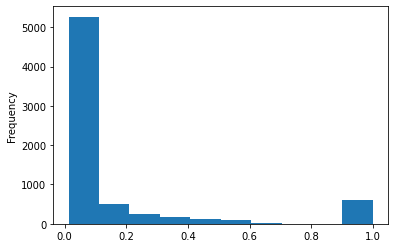

In [31]:
df['monthly_total_chg_ratio'] = df['MonthlyCharges'] / df['TotalCharges']
df['monthly_total_chg_ratio'].plot.hist()

In [32]:
df.to_csv('clean_churn_data.csv')

#### Due 20220124, January 24, 2022
#### MSDS - Week 2 Assignment
# Summary
* With the churn_data.csv dataset, I filtered outliers (even though there were none!). 
* I converted all categorial data columns to numerical besides the Customer ID column, which I thought was appropriate to keep the same. 
* I combined data columns by creating a MonthlyCharges / TotalCharges ratio data column.
* I created a histogram of the created column and exported the entire dataset to csv.
#### Thank you!
#### Created by Jeremy Beard
#### Regis University
#### MSDS 600